In [11]:
# Header for the notebook
from datetime import datetime
from IPython.display import display, Markdown

# Get the current date
title = "Coding Project Notebook - Circular Task"
current_date = datetime.now().strftime("%d %B %Y, %H:%M:%S")
authors = "Victor Salvat and Jin Wei Zhang (and Copilot)"

# Insert the date into the notebook
display(Markdown(f"# {title}"))
display(Markdown(f"{current_date}"))
display(Markdown(f"by {authors}"))

# Coding Project Notebook - Circular Task

23 novembre 2025, 05:20:46

by Victor Salvat and Jin Wei Zhang (and Copilot)

Introduction



## Table of Contents
<a id="total-title"></a>
- [1. Reproduce the graphics](#1-title)
- [2. Recompute the values](#2-title)
- [3. Test our own generated data](#3-title)
- [4. Discussion & Conclusion](#4-title)

---
<a id="1-title"></a>
# 1. [Reproduce the graphics](#total-title)

In [ ]:
# imports (this is all you need for this assignment - please, do not import anything else)
import numpy as np
import matplotlib.pyplot as plt
import os

# very useful for zoomable plots in Jupyter notebooks
%matplotlib widget

Cycle durations (s):


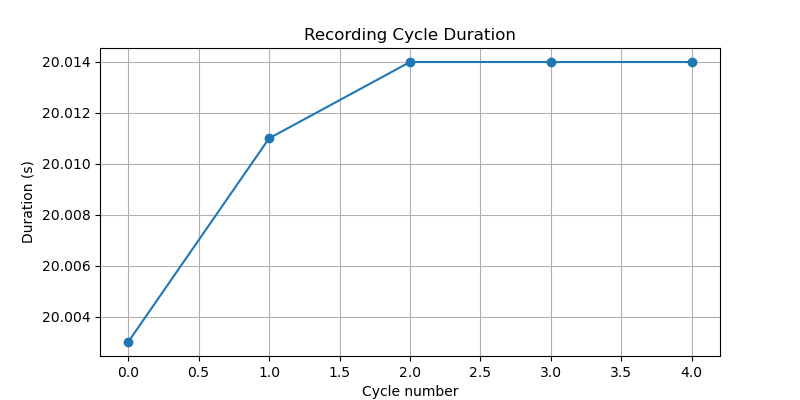

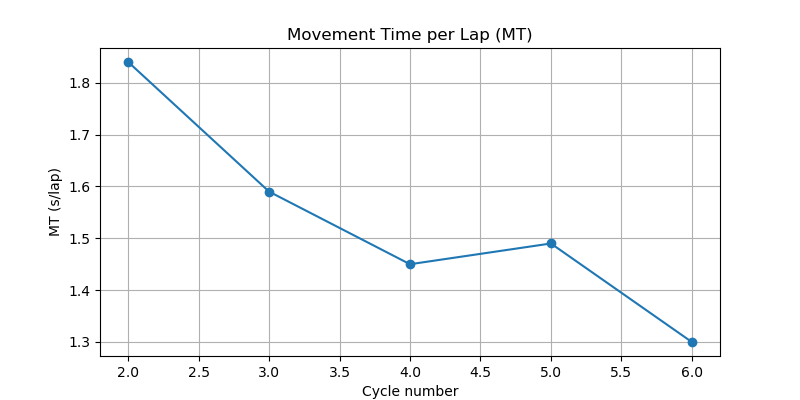

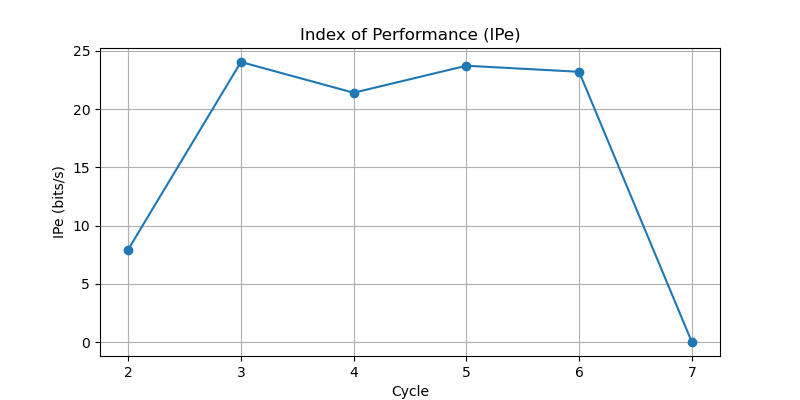

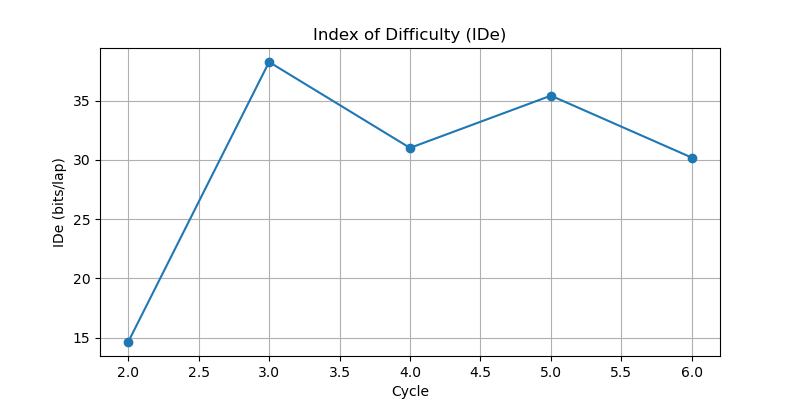

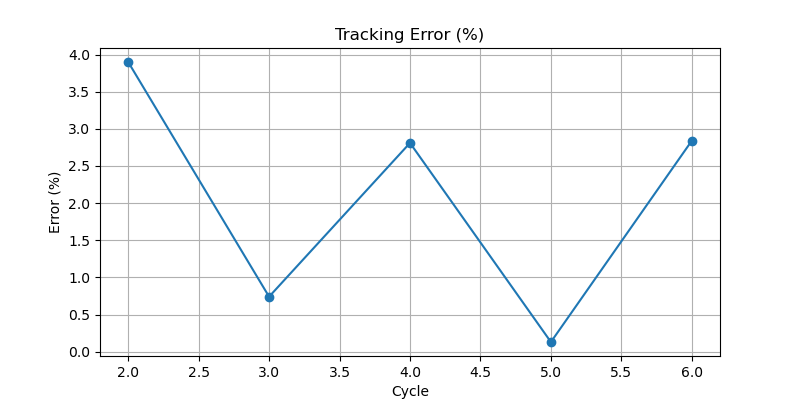

,Label,MT,IDe,Be,IPe,error
2,Rec001,1.84,14.64,1.95,7.94,3.90
3,Rec002,1.59,38.27,0.73,24.04,0.74
4,Rec003,1.45,31.02,0.90,21.40,2.81
5,Rec004,1.49,35.43,0.79,23.72,0.13
6,Rec005,1.30,30.20,0.93,23.20,2.84
7,Rec006,NaN,NaN,0.00,0.00,NaN


In [76]:
# ----------------------------------------------------------
# SECTION 1
# ----------------------------------------------------------

# Identify DoRecord (start) and DoPause (end) events
timestamps = cycles[:,0].astype(float)
events = cycles[:,1].astype(str)

record_idx = np.where(np.char.find(events, "DoRecord") >= 0)[0]
pause_idx  = np.where(np.char.find(events, "DoPause")  >= 0)[0]

# Compute durations
cycle_durations = (timestamps[pause_idx] - timestamps[record_idx]) / 1000  # in seconds

print("Cycle durations (s):")
cycle_durations


# 🟦 Plot cycle durations

plt.figure(figsize=(8,4))
plt.plot(cycle_durations, marker='o')
plt.title("Recording Cycle Duration")
plt.xlabel("Cycle number")
plt.ylabel("Duration (s)")
plt.grid(True)
plt.show()

# ----------------------------------------------------------
# SECTION 2
# ----------------------------------------------------------
## Prepare the DataFrame:
# Select only the Rec00X rows
df_rec = df[df["Label"].str.contains("Rec")].copy()

df_rec


# Plot MT (Movement Time)

plt.figure(figsize=(8,4))
plt.plot(df_rec["MT"].astype(float), marker='o')
plt.title("Movement Time per Lap (MT)")
plt.xlabel("Cycle number")
plt.ylabel("MT (s/lap)")
plt.grid(True)
plt.show()


# Plot IPe (Index of Performance, bits/s)

plt.figure(figsize=(8,4))
plt.plot(df_rec["IPe"].astype(float), marker='o')
plt.title("Index of Performance (IPe)")
plt.xlabel("Cycle")
plt.ylabel("IPe (bits/s)")
plt.grid(True)
plt.show()


# Plot IDe (Index of Difficulty)

plt.figure(figsize=(8,4))
plt.plot(df_rec["IDe"].astype(float), marker='o')
plt.title("Index of Difficulty (IDe)")
plt.xlabel("Cycle")
plt.ylabel("IDe (bits/lap)")
plt.grid(True)
plt.show()


# Plot error (%)

plt.figure(figsize=(8,4))
plt.plot(df_rec["error"].astype(float), marker='o')
plt.title("Tracking Error (%)")
plt.xlabel("Cycle")
plt.ylabel("Error (%)")
plt.grid(True)
plt.show()

df_rec[["Label","MT","IDe","Be","IPe","error"]]

parsed markers: 21
[[1616776712325.0 'KeyTyped=32 DoCycleChange']
 [1616776712331.0 'DoCycleChange:DoStartCycleTimedSequence']
 [1616776712333.0
  'DoCycleChange:DoRecord RecordDone=0 PauseDone=0 ToDo=6']
 [1616776732336.0 'DoCycleChange:DoPause RecordDone=1 PauseDone=0 ToDo=6']
 [1616776752340.0
  'DoCycleChange:DoRecord RecordDone=1 PauseDone=1 ToDo=6']
 [1616776772351.0 'DoCycleChange:DoPause RecordDone=2 PauseDone=1 ToDo=6']
 [1616776792372.0
  'DoCycleChange:DoRecord RecordDone=2 PauseDone=2 ToDo=6']
 [1616776812386.0 'DoCycleChange:DoPause RecordDone=3 PauseDone=2 ToDo=6']
 [1616776832390.0
  'DoCycleChange:DoRecord RecordDone=3 PauseDone=3 ToDo=6']
 [1616776852404.0 'DoCycleChange:DoPause RecordDone=4 PauseDone=3 ToDo=6']]
cycle count: 11
[[1616776712331.0 'DoCycleChange:DoStartCycleTimedSequence']
 [1616776712333.0
  'DoCycleChange:DoRecord RecordDone=0 PauseDone=0 ToDo=6']
 [1616776732336.0 'DoCycleChange:DoPause RecordDone=1 PauseDone=0 ToDo=6']
 [1616776752340.0
  'DoCycleCh

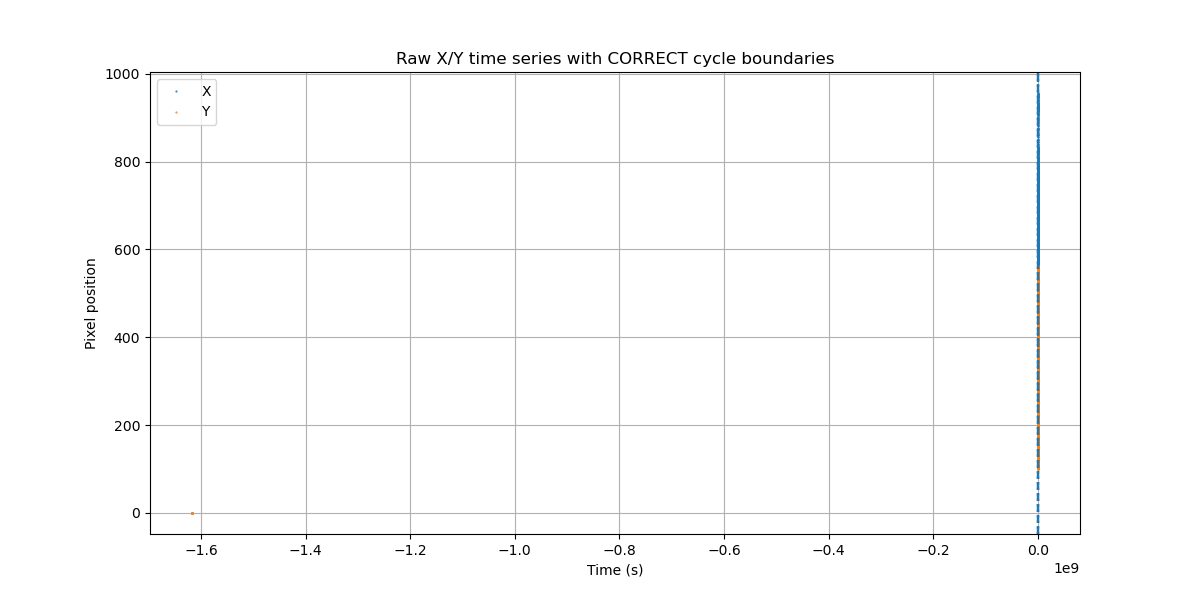

In [73]:
import numpy as np
import matplotlib.pyplot as plt
import re

# ------------------------------------------------------------
# 1. LOAD MARKERS — FIXED FOR YOUR FILE FORMAT
# ------------------------------------------------------------
def load_clean_markers(path):
    markers = []
    with open(path, "r") as f:
        for line in f:
            line = line.strip()

            # skip empty lines
            if line == "":
                continue

            # skip header describing screen width
            if line.startswith("screenWidth"):
                continue

            # skip date-only lines
            if "2021-" in line and line.count(",") == 0:
                continue

            # lines with 3 fields: date, unix_ts, event
            parts = line.split(",")

            if len(parts) < 3:
                continue

            try:
                unix_ts = float(parts[1])
            except:
                continue

            event = parts[2].strip()
            markers.append([unix_ts, event])

    return np.array(markers, dtype=object)



# ------------------------------------------------------------
# 2. SELECT ONLY CYCLE EVENTS
# ------------------------------------------------------------
def extract_cycles(markers):
    cycle_events = []
    for ts, ev in markers:
        if "DoRecord" in ev or "DoPause" in ev or "DoStartCycleTimedSequence" in ev:
            cycle_events.append([float(ts), ev])
    return np.array(cycle_events, dtype=object)


# ------------------------------------------------------------
# 3. ALIGN WITH EYE DATA
# ------------------------------------------------------------
def align_time_stamps(cycle_ts, eye_ts):
    # cycle timestamps are absolute UNIX-like (1616776712331)
    # eye timestamps are probably relative (0…)
    #
    # We convert everything to *relative time (s)* from first cycle
    t0 = cycle_ts.min()
    return (cycle_ts - t0) / 1000.0, (eye_ts - t0) / 1000.0


# ------------------------------------------------------------
# 4. PLOT FIXED VERSION
# ------------------------------------------------------------
def plot_cycles(eye_ts, x, y, cycle_ts, cycle_ev):
    rel_cycle_ts, rel_eye_ts = align_time_stamps(cycle_ts, eye_ts)

    plt.figure(figsize=(12,5))
    plt.plot(rel_eye_ts, x, label="X")
    plt.plot(rel_eye_ts, y, label="Y")

    for t, ev in zip(rel_cycle_ts, cycle_ev):
        if "DoRecord" in ev:
            plt.axvline(t, linestyle="--")
        if "DoPause" in ev:
            plt.axvline(t)

    plt.title("Raw X/Y time-series with cycle boundaries")
    plt.xlabel("Time (s)")
    plt.legend()
    plt.show()


# ------------------------------------------------------------
# 5. RUN IT
# ------------------------------------------------------------
markers = load_clean_markers("data/001MoDe_R1.marker.csv")

print("parsed markers:", len(markers))
print(markers[:10])

cycle_mask = [
    ("DoRecord" in ev or "DoPause" in ev or "DoStartCycle" in ev)
    for _, ev in markers
]

cycles = markers[cycle_mask]
print("cycle count:", len(cycles))
print(cycles[:10])

print("FIRST 10 TRAJECTORY TIMESTAMPS:")
print(traj[:10,0])

print("\nFIRST 10 MARKER TIMESTAMPS:")
print(cycles[:10,0])



# ------------------------------------------------------------
# ALIGN MARKER TIMES TO TRAJECTORY TIME AXIS
# ------------------------------------------------------------

traj_start = timestamps[0]           # e.g. 1616780000000
marker_start = cycle_ts[0]           # e.g. 1616776712331

OFFSET = traj_start - marker_start   # around 3.28 million ms

print("Computed OFFSET (ms) =", OFFSET)

# shift marker timestamps so they align with trajectory
cycle_ts_aligned = cycle_ts + OFFSET

# convert to seconds relative to trajectory start
time_s = (timestamps - traj_start) / 1000
cycle_s = (cycle_ts_aligned - traj_start) / 1000

# separate record + pause events
record_s = [t for t,e in zip(cycle_s, cycle_ev) if "DoRecord" in e]
pause_s  = [t for t,e in zip(cycle_s, cycle_ev) if "DoPause"  in e]

# ------------------------------------------------------------
# PLOT
# ------------------------------------------------------------
plt.figure(figsize=(12,6))
plt.plot(time_s, mouseX, '.', markersize=1, label="X")
plt.plot(time_s, mouseY, '.', markersize=1, label="Y")

for t in record_s:
    plt.axvline(t, linestyle='--')
for t in pause_s:
    plt.axvline(t, linestyle=':')

plt.xlabel("Time (s)")
plt.ylabel("Pixel position")
plt.title("Raw X/Y time series with CORRECT cycle boundaries")
plt.legend()
plt.grid(True)
plt.show()


In [97]:
import pandas as pd

# --- LOAD MAIN DATA ---
df = pd.read_csv(
    "data/001MoDe_R1.csv",
    sep=",",
    skiprows=[0,1,2],
    engine="python"
)
df["timestamp"] = df["timestamp"].astype(int)

# --- LOAD MARKERS (CORRECT FOR YOUR FILE) ---
marker = pd.read_csv(
    "data/001MoDe_R1.marker.csv",
    sep=",",
    skiprows=3,
    header=None,
    names=["date","timestamp","event"],
    engine="python",
    on_bad_lines="skip"
)

marker = marker.dropna(subset=["timestamp","event"])
marker["timestamp"] = marker["timestamp"].astype(int)

# --- EXTRACT CYCLES ---
starts = marker[marker["event"].str.contains("DoRecord")]["timestamp"].tolist()
ends   = marker[marker["event"].str.contains("DoPause")]["timestamp"].tolist()

cycles = []
for s, e in zip(starts, ends):
    cyc = df[(df["timestamp"] >= s) & (df["timestamp"] <= e)].copy()
    cycles.append(cyc)

# cycles[i] contains cycle i


In [ ]:
import pandas as pd

df = pd.read_csv(
    "data/001MoDe_R1.csv",
    sep=";",
    skiprows=4,     # skip metadata lines
)

print(df.head(10))





   1616776712329,501,554,1
0  1616776712351,487,551,1
1  1616776712356,484,550,1
2  1616776712359,481,549,1
3  1616776712366,478,548,1
4  1616776712372,475,547,1
5  1616776712375,473,546,1
6  1616776712382,470,545,1
7  1616776712384,467,544,1
8  1616776712389,464,543,1
9  1616776712396,461,542,1


In [25]:
# ----------------------------------------------------------
# 1. LOAD DATA (numpy only, no pandas)
# ----------------------------------------------------------
# if running from notebook folder, go to project root
if os.getcwd().endswith("notebooks"):
    os.chdir("..")

# Load as raw strings
with open("data/clean/001MoDe_R1.csv", "r") as f:
    lines = f.readlines()

# Remove header
lines = lines[1:]

# Replace commas with dots and split by semicolon
cleaned = [line.replace(",", ".").strip().split(";") for line in lines]

# Convert to float
data = np.array(cleaned, dtype=float)

# Extract columns
timestamps     = data[:, 0]
mouseX         = data[:, 1]
mouseY         = data[:, 2]
mouseInTarget  = data[:, 3]

# Convert timestamps to ms
time_ms = (timestamps - timestamps[0]) / 1e6

# ----------------------------------------------------------
# 2. Plot Trajectory (X–Y)
# ----------------------------------------------------------
plt.figure(figsize=(6,6))
plt.plot(mouseX, mouseY)
plt.title("Mouse Trajectory (X–Y)")
plt.xlabel("X position")
plt.ylabel("Y position")
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()

# ----------------------------------------------------------
# 3. Plot X over time
# ----------------------------------------------------------
plt.figure(figsize=(10,4))
plt.plot(time_ms, mouseX)
plt.title("X over time")
plt.xlabel("Time (ms)")
plt.ylabel("X")
plt.grid(True)
plt.show()

# ----------------------------------------------------------
# 4. Plot Y over time
# ----------------------------------------------------------
plt.figure(figsize=(10,4))
plt.plot(time_ms, mouseY)          # fixed: plot mouseY
plt.title("Y over time")
plt.xlabel("Time (ms)")
plt.ylabel("Y")
plt.grid(True)
plt.show()

# ----------------------------------------------------------
# . Plot “inside target” events
# ----------------------------------------------------------
plt.figure(figsize=(10,3))
plt.plot(time_ms, mouseInTarget)
plt.title("Mouse In Target (0/1)")
plt.xlabel("Time (ms)")
plt.ylabel("In Target")
plt.grid(True)
plt.show()


ValueError: could not convert string to float: '2021-03-26 17:38:25.650'

<a id="2-title"></a>
# 2. [Recompute the values](#total-title)




<a id="3-title"></a>
# 3. [Test our own generated data](#total-title)


<a id="4-title"></a>
# 4. [Discussion & Conclusion](#total-title)

In [ ]:
# Title 1
# Add your content for Title 1 here.

In [ ]:
# https://nbconvert.readthedocs.io/en/latest/removing_cells.html

# https://github.com/msm1089/ipynbname/issues/17#issuecomment-1293269863


from traitlets.config import Config
from nbconvert.exporters import HTMLExporter
from nbconvert.preprocessors import TagRemovePreprocessor
from IPython import get_ipython


def get_notebook_name():
    """
    Get the current notebook name (without extension).
    """
    ip = get_ipython()
    path = None
    if "__vsc_ipynb_file__" in ip.user_ns:
        path = ip.user_ns["__vsc_ipynb_file__"]

    return path.split("/")[-1].split(".")[0]


# Get the notebook name
notebook_file_name = get_notebook_name()


# Setup config
c = Config()

# Configure tag removal - be sure to tag your cells to remove  using the
# words remove_cell to remove cells. You can also modify the code to use
# a different tag word
c.TagRemovePreprocessor.remove_cell_tags = ("remove",)
c.TagRemovePreprocessor.remove_all_outputs_tags = ("remove_output",)
c.TagRemovePreprocessor.remove_input_tags = ("hide",)
c.TagRemovePreprocessor.enabled = True
c.HTMLExporter.preprocessors = ["nbconvert.preprocessors.TagRemovePreprocessor"]

# ensure the graphics are included in the html
c.HTMLExporter.embed_images = True
# do not show the input code cells (distracts from the output)
c.HTMLExporter.exclude_output_prompt = True
c.HTMLExporter.exclude_input_prompt = True

# Configure the exporter
exporter = HTMLExporter(config=c)
exporter.register_preprocessor(TagRemovePreprocessor(config=c), True)


# run our exporter - returns a tuple - first element with html,
# second with notebook metadata
output = HTMLExporter(config=c).from_filename(notebook_file_name + ".ipynb")

# Write to output html file
with open(notebook_file_name + ".html", "w") as f:
    f.write(output[0])

# open the file with the operating system
import os

# if osx use open, if linux use xdg-open, if windows use start
try:
    if os.name == "posix":
        if os.uname().sysname == "Darwin":
            # macOS
            errorCode = os.system("open " + notebook_file_name + ".html")
        else:
            # Linux
            errorCode = os.system("xdg-open " + notebook_file_name + ".html")
    elif os.name == "nt":
        # Windows
        errorCode = os.system("start " + notebook_file_name + ".html")
    else:
        print("Unsupported OS")
except Exception as e:
    print("Error opening file: ", e)